In [1]:
import pandas as pd 
import numpy as np 
from bertopic import BERTopic 
import os
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
import joblib
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_dir = 'D:/abstract/climate change/all_inter_withlabel.csv'
df = pd.read_csv(data_dir, engine='python')

In [3]:
df

,Unnamed: 0.1,Unnamed: 0,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,...,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record,label
0,0,15,J,"Seidov, D; Barron, E; Haupt, BJ",NaN,NaN,NaN,"Seidov, D; Barron, E; Haupt, BJ",NaN,NaN,...,Physical Geography; Geology,514LB,NaN,NaN,NaN,NaN,2022-11-30,WOS:000173439700004,0,4
1,1,24,J,"Stephens, C; Levitus, S; Antonov, J; Boyer, TP",NaN,NaN,NaN,"Stephens, C; Levitus, S; Antonov, J; Boyer, TP",NaN,NaN,...,Geology,476GF,NaN,NaN,NaN,NaN,2022-11-30,WOS:000171217300025,0,4
2,2,37,J,"Vink, A; Ruhlemann, C; Zonneveld, KAF; Mulitza...",NaN,NaN,NaN,"Vink, A; Ruhlemann, C; Zonneveld, KAF; Mulitza...",NaN,NaN,...,Geology; Oceanography; Paleontology,473WW,NaN,Bronze,NaN,NaN,2022-11-30,WOS:000171072800004,0,4
3,3,39,J,"Wang, B; An, SI",NaN,NaN,NaN,"Wang, B; An, SI",NaN,NaN,...,Geology,476GF,NaN,"Green Submitted, Bronze",NaN,NaN,2022-11-30,WOS:000171217300022,0,4
4,4,42,J,"Weber, ME; Mayer, LA; Hillaire-Marcel, C; Bilo...",NaN,NaN,NaN,"Weber, ME; Mayer, LA; Hillaire-Marcel, C; Bilo...",NaN,NaN,...,Geology; Oceanography; Paleontology,473WW,NaN,NaN,NaN,NaN,2022-11-30,WOS:000171072800006,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52211,52211,471141,J,"Hare, JA; Manderson, JP; Nye, JA; Alexander, M...",NaN,NaN,NaN,"Hare, Jonathan A.; Manderson, John P.; Nye, Ja...",NaN,NaN,...,Fisheries; Marine & Freshwater Biology; Oceano...,021IE,NaN,Bronze,NaN,NaN,2022-11-30,WOS:000309877700007,0,3
52212,52212,471158,J,"Hazeleger, W; Wang, X; Severijns, C; Stefanesc...",NaN,NaN,NaN,"Hazeleger, W.; Wang, X.; Severijns, C.; Stefan...",NaN,NaN,...,Meteorology & Atmospheric Sciences,034JZ,NaN,NaN,NaN,NaN,2022-11-30,WOS:000310870200002,0,1
52213,52213,471180,J,"Hernandez-Miranda, E; Quinones, RA; Aedo, G; D...",NaN,NaN,NaN,"Hernandez-Miranda, Eduardo; Quinones, Renato A...",NaN,NaN,...,Marine & Freshwater Biology; Oceanography,098ZE,NaN,"Green Submitted, gold, Green Published",NaN,NaN,2022-11-30,WOS:000315586800010,0,3
52214,52214,471193,J,"Hodson, DLR; Sutton, RT",NaN,NaN,NaN,"Hodson, Daniel L. R.; Sutton, Rowan T.",NaN,NaN,...,Meteorology & Atmospheric Sciences,038VV,NaN,Green Accepted,NaN,NaN,2022-11-30,WOS:000311203100019,0,1


In [4]:
df_drop = df.dropna(subset='Abstract')

In [5]:
docs = df_drop['Abstract'].to_list()

In [6]:
len(docs)

52216

In [7]:
vectorizer_model = CountVectorizer(stop_words="english")
cluster_model = KMeans(n_clusters=30)
model = BERTopic(hdbscan_model=cluster_model, vectorizer_model=vectorizer_model, verbose=True)

In [8]:
topics, probabilities = model.fit_transform(docs)

Batches:   0%|          | 0/1632 [00:00<?, ?it/s]

2023-03-01 22:11:52,909 - BERTopic - Transformed documents to Embeddings
2023-03-01 22:12:25,138 - BERTopic - Reduced dimensionality
2023-03-01 22:12:28,510 - BERTopic - Clustered reduced embeddings


In [9]:
joblib.dump(vectorizer_model, 'D:/abstract/climate change/abstract_vec.pkl')

['D:/abstract/climate change/abstract_vec.pkl']

In [10]:
# 获得embeddings
#model.save('D:/abstract/climate change/model')
df_drop['topic'] = topics
#df_drop.to_csv('D:/abstract/climate change/all_inter_withtopic.csv', index=False)
#np.save('D:/abstract/experiment/kmeans/docs_prob.npy', probabilities)
docs_emb = model._extract_embeddings(docs)
#np.save('D:/abstract/climate change/model/docs_emb.npy', docs_emb)
model._create_topic_vectors()
topic_emb = model.topic_embeddings
#np.save('D:/abstract/climate change/model/topic_emb.npy', topic_emb)

In [34]:
model.get_topics()

{0: [('water', 0.04061390532691515),
  ('climate', 0.030866481168144555),
  ('river', 0.029465877254506678),
  ('change', 0.027115578850403846),
  ('model', 0.025785807332436888),
  ('runoff', 0.02209596539255606),
  ('flood', 0.021582388928726357),
  ('precipitation', 0.020983853234000094),
  ('study', 0.019839702460345977),
  ('hydrological', 0.018924405646765195)],
 1: [('ka', 0.020531088185254415),
  ('changes', 0.020314053695808028),
  ('delta', 0.019744401872864754),
  ('similar', 0.019498229141542495),
  ('holocene', 0.01905781789673253),
  ('bp', 0.01905585464278158),
  ('climate', 0.018888327552762617),
  ('glacial', 0.01862783724658835),
  ('records', 0.01862152408899403),
  ('ice', 0.017419048432581213)],
 2: [('ice', 0.04135067047879786),
  ('sea', 0.04081464759892042),
  ('ocean', 0.03277864963793529),
  ('climate', 0.030969219459486347),
  ('model', 0.02856042993392062),
  ('surface', 0.026594666607318258),
  ('temperature', 0.02282737339737757),
  ('arctic', 0.0223190647

In [43]:
model.visualize_barchart(top_n_topics=10)

In [11]:
# 先求质心，再降维
topic_list = list(df_drop['topic'])
topic_10 = [np.empty((0,384))]*30
for i in range(len(topic_list)):
    topic_10[topic_list[i]] = np.vstack((topic_10[topic_list[i]], docs_emb[i]))

In [12]:
topic_emb = np.empty((0,384))
for i in range(30):
    topic_i = topic_10[i].mean(axis=0)
    topic_emb = np.vstack((topic_emb, topic_i))

In [13]:
docs_topic_emb = np.concatenate([docs_emb, topic_emb])

In [14]:
tsne = TSNE(n_components=2)
tsne.fit_transform(docs_topic_emb)
docs_topic_vector = tsne.embedding_

In [49]:
np.save('D:/abstract/climate change/model/384_docs_topic_vec.npy', docs_topic_vector)

In [15]:
# 主题词去重
topic_name = []
model_topics = model.get_topics()
for i in range(0, 30):
    topic_name.append(model_topics[i][0][0])

In [16]:
dic={}
for key in topic_name:
    dic[key]=dic.get(key,0)+1

In [17]:
for i in range(0, 30):
    if dic[topic_name[i]] != 1:
        print(topic_name[i]+':'+str(dic[topic_name[i]]))

water:2
water:2
ice:3
ice:3
ice:3


In [18]:
df_topic_name = pd.DataFrame(topic_name)

In [19]:
df_topic_name

,0
0,species
1,bp
2,pacific
3,phytoplankton
4,water
5,co2
6,indian
7,vegetation
8,precipitation
9,delta


In [29]:
df_topic_name.to_csv('D:/abstract/climate change/topic_name_30.csv', index=False)

In [20]:
len(docs_topic_vector)

52246

In [21]:
# 画图
docs_vec = docs_topic_vector[:52216]
topic_vec = docs_topic_vector[52216:]

In [28]:
topic

,0
0,water
1,ka
2,ice
3,pacific
4,drought
5,co2
6,species
7,carbon
8,coastal
9,coral


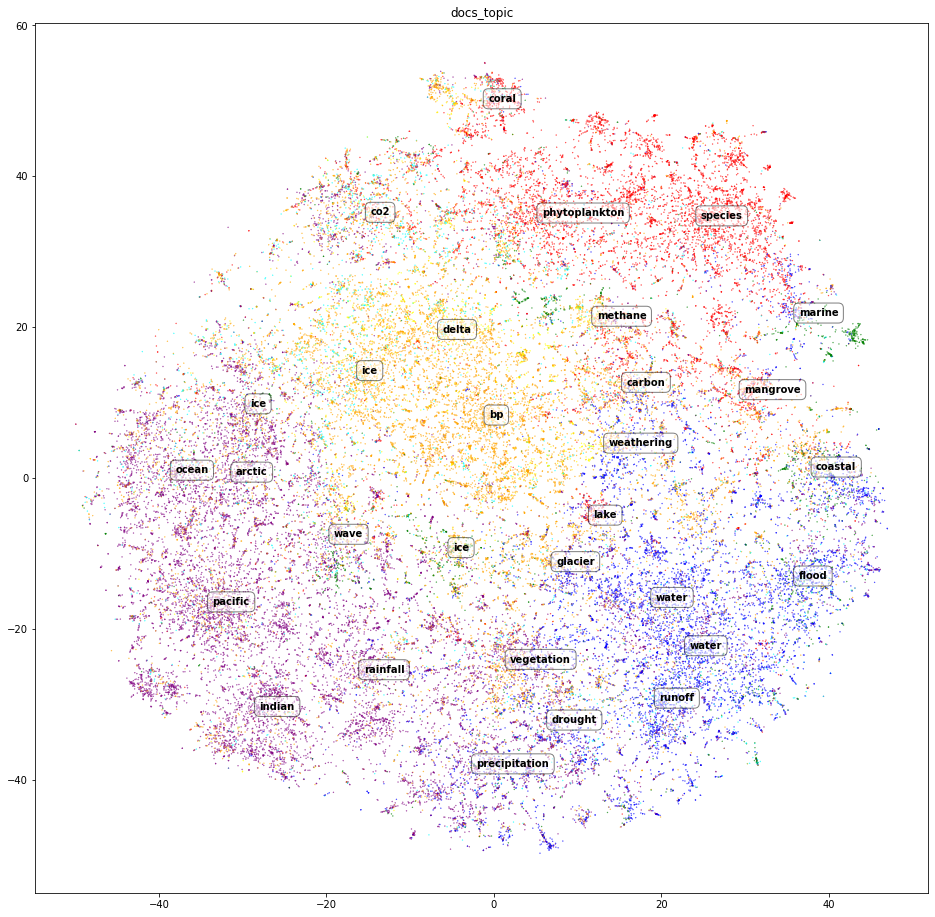

In [30]:
#col_colors = ['gray']*52216
col = list(df['label'])
colors = ['#00FFFF', '#800080', '#008000', '#FF0000', '#FFA500', '#0000FF', '#FFFF00', '#FFFFFF']
'''
'Science & Technology - Other Topics',
'Meteorology & Atmospheric Sciences',
'Engineering',
'Marine & Freshwater Biology',
'Geology',
'Water Resources',
'Geochemistry & Geophysics'
'''
col_colors = []
for i in range(len(col)):
    col_colors.append(colors[col[i]])



import matplotlib.pyplot as plt

x = list(docs_vec[:,0])
y = list(docs_vec[:,1])
x_topic = list(topic_vec[:,0])
y_topic = list(topic_vec[:,1])

plt.figure(figsize=(16,16))
plt.scatter(x, y, s=0.1, c=col_colors)
topic = pd.read_csv('D:/abstract/climate change/topic_name_30.csv')
for i in range(30):
    plt.text(topic_vec[i,0], topic_vec[i,1], topic.loc[i, '0'], fontweight='bold', bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='k',lw=1 ,alpha=0.5))
plt.title('docs_topic')
plt.show()